(mind)=
# Platform



 

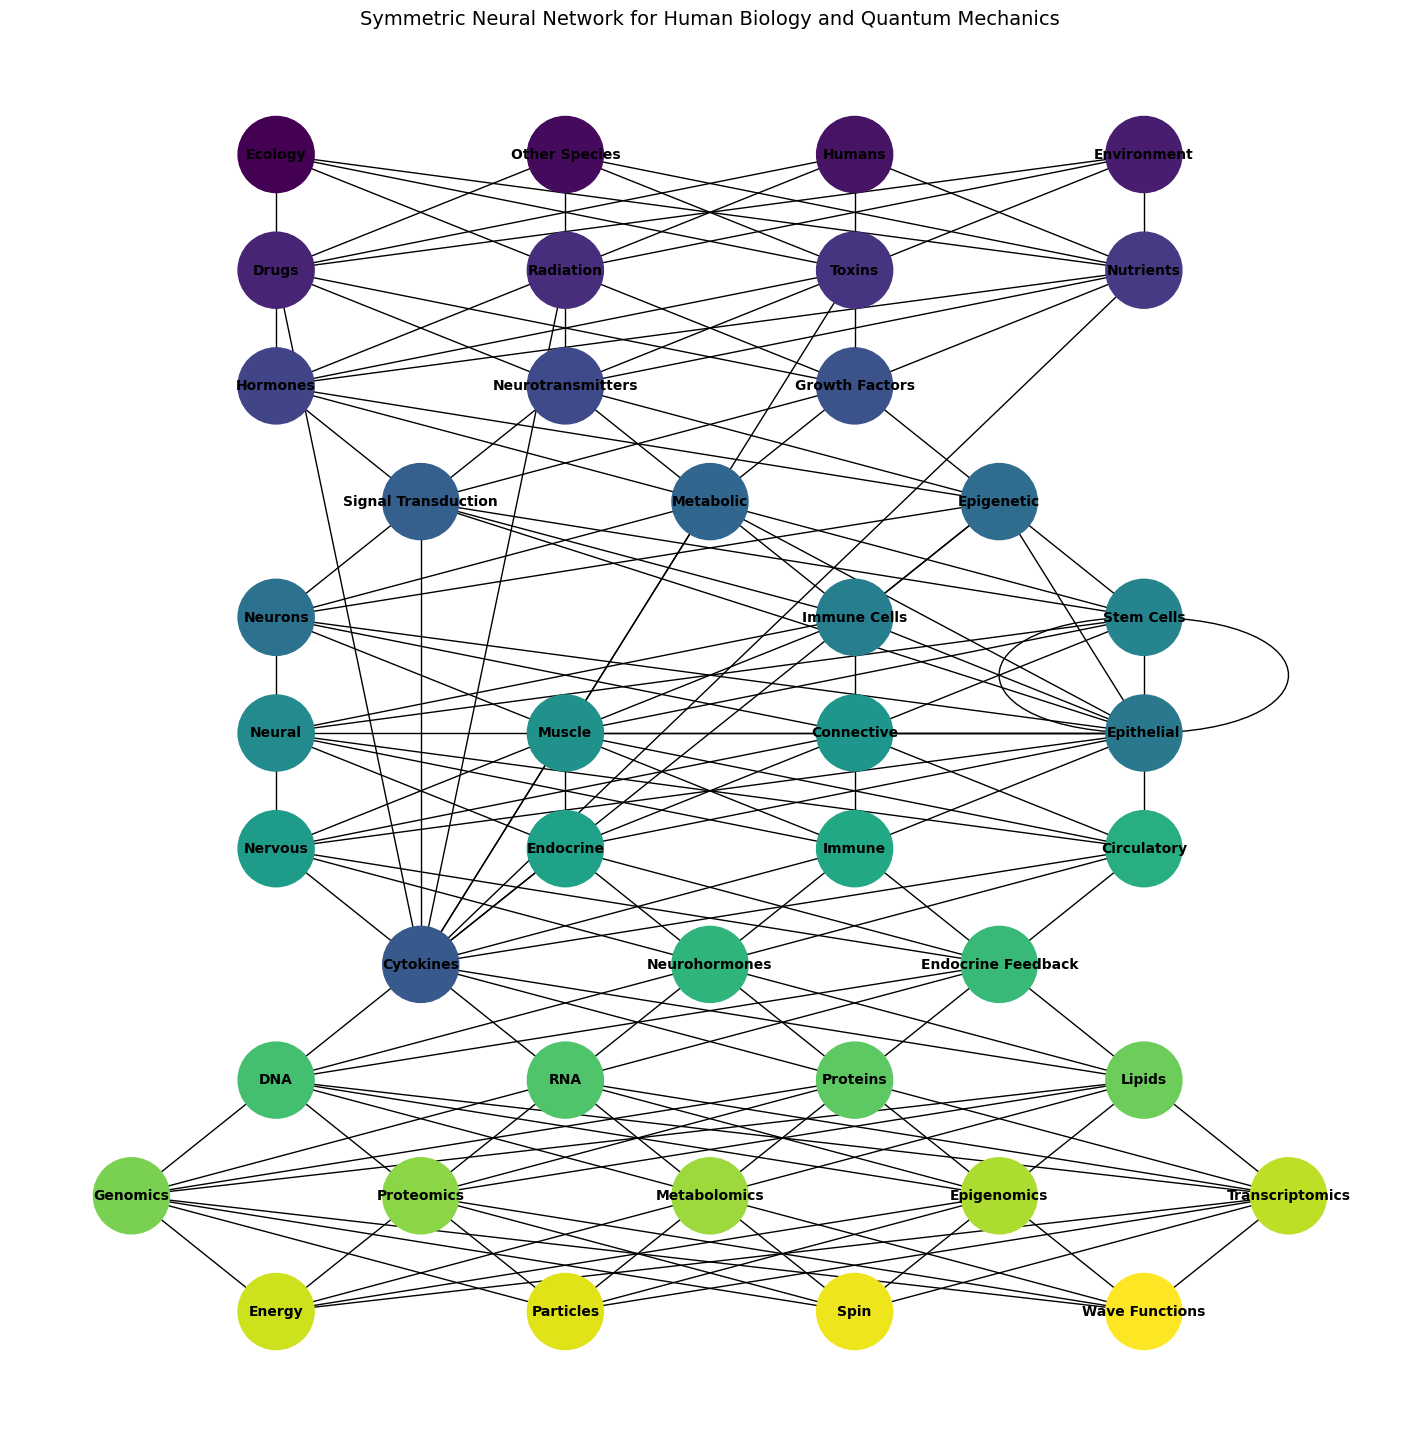

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Define layers for the multi-layer symmetric neural network representing human biology
# The innermost layer is quantum mechanics, progressing outward to -omics, molecular biology, and more

# Define all layers of nodes
layers = {
    "Biology": ['Ecology', 'Other Species', 'Humans', 'Environment'],
    "Drugs and External Factors": ['Drugs', 'Radiation', 'Toxins', 'Nutrients'],
    "Ligands & Receptors": ['Hormones', 'Neurotransmitters', 'Growth Factors', 'Cytokines'],
    "Pathways": ['Signal Transduction', 'Metabolic', 'Epigenetic'],
    "Cells": ['Neurons', 'Epithelial', 'Immune Cells', 'Stem Cells'],
    "Tissues": ['Neural', 'Muscle', 'Connective', 'Epithelial'],
    "Systems": ['Nervous', 'Endocrine', 'Immune', 'Circulatory'],
    "Immuno-Neuro-Endocrinology": ['Cytokines', 'Neurohormones', 'Endocrine Feedback'],
    "Molecular Biology": ['DNA', 'RNA', 'Proteins', 'Lipids'],
    "Omics": ['Genomics', 'Proteomics', 'Metabolomics', 'Epigenomics', 'Transcriptomics'],
    "Quantum": ['Energy', 'Particles', 'Spin', 'Wave Functions']
}

# Initialize the graph
G_biology = nx.DiGraph()

# Add nodes for each layer
for layer_name, nodes in layers.items():
    G_biology.add_nodes_from(nodes, layer=layer_name)

# Connect layers sequentially
layer_names = list(layers.keys())
for i in range(len(layer_names) - 1):
    source_layer = layers[layer_names[i]]
    target_layer = layers[layer_names[i + 1]]
    for source_node in source_layer:
        for target_node in target_layer:
            G_biology.add_edge(source_node, target_node)

# Define node positions for symmetric visualization
pos_biology = {}
layer_spacing = 2
node_spacing = 1.5

for i, (layer_name, nodes) in enumerate(layers.items()):
    y = -i * layer_spacing
    for j, node in enumerate(nodes):
        x = j * node_spacing - (len(nodes) - 1) * node_spacing / 2
        pos_biology[node] = (x, y)

# Correcting the mismatch between node colors and nodes in the graph
# Count the actual number of nodes in the graph
actual_node_count = len(G_biology.nodes())

# Generate colors based on the actual node count
node_colors_biology = plt.cm.viridis(np.linspace(0, 1, actual_node_count))

# Draw the graph with corrected color assignments
plt.figure(figsize=(14, 14))
nx.draw(
    G_biology,
    pos_biology,
    with_labels=True,
    node_size=3000,
    node_color=node_colors_biology,
    font_size=10,
    font_weight='bold',
    arrows=False
)

# Add title and remove axes for clean visualization
plt.title("Symmetric Neural Network for Human Biology and Quantum Mechanics", fontsize=14)
plt.axis('off')
plt.show()


```{figure} https://www.harleytherapy.co.uk/counselling/wp-content/uploads/freud-and-jung.jpg
---
width: 1%
height: 1%
---
_Move Over Freud, Jung, and Nietzsche_. Here's the visualization of the symmetric multilayer neural network representing human biology, [progressing](https://abikesa.github.io/medicine/) from outer biological, sociological, and psychological factors inward to quantum mechanics. Each layer is color-coded, and the network properly aligns node colors with the number of nodes. This is the first iteration built along with GPT-4o. Let the iterations begin!
```